┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1192
┌ Info: Installing matplotlib via the Conda matplotlib package...
└ @ PyCall /Users/jayyao/.julia/packages/PyCall/0jMpb/src/PyCall.jl:653
┌ Info: Running `conda install -y matplotlib` in root environment
└ @ Conda /Users/jayyao/.julia/packages/Conda/uQitS/src/Conda.jl:112


Solving environment: ...working... done


pyparsing-2.3.0      | 101 KB    | ########## | 100% 
cycler-0.10.0        | 14 KB     | ########## | 100% 
matplotlib-3.0.2     | 6.5 MB    | ########## | 100% 
pytz-2018.7          | 244 KB    | ########## | 100% 
freetype-2.9.1       | 864 KB    | ########   |  81% 


## Package Plan ##

  environment location: /Users/jayyao/.julia/conda/3

  added / updated specs: 
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pyparsing-2.3.0            |           py37_0         101 KB
    cycler-0.10.0              |           py37_0          14 KB
    matplotlib-3.0.2           |   py37h54f8f79_0         6.5 MB
    pytz-2018.7                |           py37_0         244 KB
    freetype-2.9.1             |       hb4e5f40_0         864 KB
    kiwisolver-1.0.1           |   py37h0a44026_0          56 KB
    ------------------------------------------------------------
                                           Total:         7.8 MB

The following NEW packages will be INSTALLED:

    cycler:     0.10.0-py37_0       
    freetype:   2.9.1-hb4e5f40_0    
    kiwisolver: 1.0.1-py37h0a44026_0
    matplotlib: 3.0.2-py37h54f8f79_0
    pyparsing:  2.3.

freetype-2.9.1       | 864 KB    | ########## | 100% 
kiwisolver-1.0.1     | 56 KB     | ########## | 100% 

done
Verifying transaction: ...working... done
Executing transaction: ...working... done


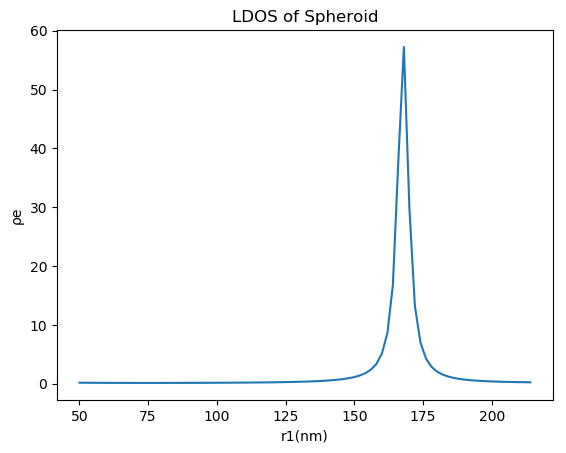

PyObject Text(24.000000000000007, 0.5, 'ρe')

In [3]:
using PyPlot
# d_min = 50 nm, λ = 550nm
Data = [0.161739 -4.42328 -2.21139 -4.01989
0.153699 -3.65225 -2.40242 -3.31606
0.147067 -3.00876 -2.58743 -2.73215
0.141603 -2.46406 -2.7692 -2.2247
0.137153 -2.00201 -2.94735 -1.8084
0.133536 -1.60573 -3.12064 -1.42531
0.130686 -1.26232 -3.29415 -1.11614
0.128453 -0.963931 -3.46276 -0.831356
0.126791 -0.700047 -3.63128 -0.580308
0.12563 -0.466057 -3.79933 -0.360235
0.12491 -0.255797 -3.96764 -0.147432
0.124615 -0.0647908 -4.13778 0.0229528
0.124661 0.111694 -4.30736 0.181623
0.125024 0.275073 -4.47852 0.342153
0.125708 0.428411 -4.65288 0.503128
0.126715 0.576964 -4.83371 0.655954
0.128026 0.722871 -5.02044 0.783725
0.129594 0.86484 -5.21316 0.983079
0.13156 1.00988 -5.42309 1.06834
0.133697 1.15409 -5.63251 1.22028
0.136137 1.30323 -5.8567 1.3811
0.138899 1.46015 -6.09437 1.49853
0.141897 1.62185 -6.34205 1.7456
0.145388 1.79954 -6.62045 1.87152
0.149131 1.98795 -6.91076 2.09982
0.15333 2.19296 -7.23128 2.30973
0.15795 2.41757 -7.57984 2.52695
0.163004 2.66596 -7.95912 2.82319
0.16865 2.94434 -8.38239 3.08595
0.174822 3.25429 -8.84584 3.50063
0.181823 3.60779 -9.37586 3.74175
0.189307 4.00477 -9.94665 4.22153
0.19775 4.46179 -10.5962 4.73509
0.20722 4.98783 -11.342 5.28493
0.21779 5.59494 -12.1829 5.94421
0.229678 6.30689 -13.1527 6.72362
0.243126 7.14466 -14.2746 7.61519
0.258356 8.12848 -15.5781 8.76599
0.275888 9.31723 -17.1162 10.0155
0.295919 10.7501 -18.9382 11.6911
0.319301 12.492 -21.1279 13.6142
0.34653 14.6597 -23.778 15.886
0.378302 17.3109 -26.9851 19.0827
0.416467 20.6981 -31.007 22.7301
0.461927 25.0031 -36.0214 27.8332
0.517593 30.6505 -42.4841 34.3179
0.586229 38.1568 -50.8913 43.0352
0.6723 48.2401 -62.0781 55.2014
0.782703 62.4332 -77.4157 73.8716
0.930446 83.1025 -99.4235 96.9068
1.12426 113.282 -130.876 134.166
1.39259 159.556 -178.411 197.429
1.78745 236.839 -255.985 297.89
2.38323 370.074 -387.756 480.866
3.34496 622.075 -631.635 878.058
5.10108 1173.15 -1154.6 1753.34
8.60776 2518.67 -2409.42 4082.24
16.7723 6326.43 -5899 10674.2
38.1207 15223.3 -13988.2 9559.57
57.2399 -6161.94 4357.01 -13674.2
29.8915 -12654.6 10314.9 -8329.84
13.2318 -4694.89 3740.57 -3092.58
7.04662 -1938.32 1497.52 -1370.58
4.30547 -942.593 702.809 -710.281
2.8849 -517.782 371.509 -410.122
2.06466 -311.403 213.84 -252.152
1.56036 -201.824 132.185 -168.264
1.22383 -137.453 85.3527 -117.397
0.989035 -97.5791 56.991 -84.6947
0.819646 -71.5394 38.9554 -63.6647
0.692316 -53.8883 26.8652 -48.1543
0.596008 -41.5082 18.7153 -37.0427
0.521922 -32.6943 13.0427 -29.7775
0.462367 -26.1167 8.91029 -24.0412
0.414285 -21.1615 5.84254 -18.5387
0.377208 -17.449 3.60843 -16.7557
0.343696 -14.4021 1.84255 -13.3631
0.31697 -12.0414 0.437178 -11.3554
0.294259 -10.1461 -0.616868 -9.48581
0.275287 -8.60666 -1.48946 -8.02678
0.259234 -7.35255 -2.17839 -6.875
0.245484 -6.31152 -2.75898 -5.96336
0.233557 -5.44062 -3.22241 -4.97054
]
ρs = Data[:,1];
dρ1 = Data[:,2];
dρ2 = Data[:,3];
dρs = Data[:,4];
N = length(ρs);
sr = 50
st = sr+(N-1)*2;
r1 = range(sr,stop=st,step=2);
plot(r1,ρs)
title("LDOS of Spheroid")
xlabel("r1(nm)")
ylabel("ρe")

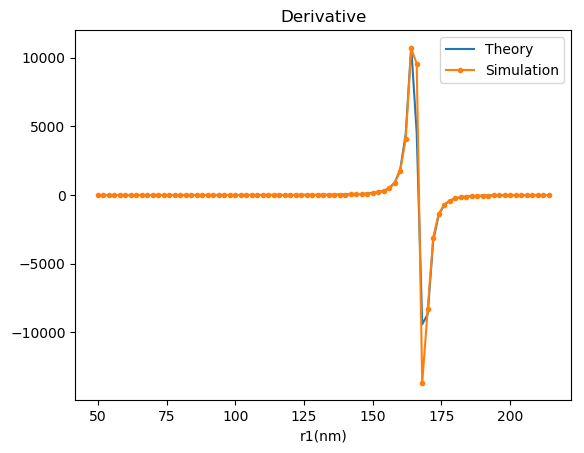

PyObject <matplotlib.legend.Legend object at 0x13aa26940>

In [4]:
dρt = zeros(N-1)
for i=1:N-1
    dρt[i] = (dρ1[i]+dρ1[i+1])/2
end
plot(r1[1:N-1],dρt,label="Theory")
plot(r1,dρs,".-",label="Simulation")
xlabel("r1(nm)")
title("Derivative")
legend()

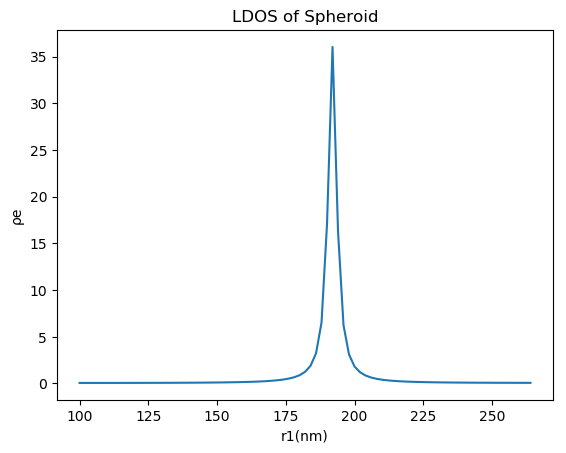

PyObject Text(24.000000000000007, 0.5, 'ρe')

In [12]:
# d_min = 100nm, λ=550
Data=[ #1 Rho_s
 #2 Dfdr1_t (Theoretical gradients using SIE) 
 #2 Dfdr2_t (Theoretical gradients using SIE) 
 #3 Dfdr_s (Simulation gradients using forward diff)
0.0615746 -0.158252 -0.0793479 -0.128714
0.0613171 -0.097594 -0.0992497 -0.0693817
0.0611784 -0.0379853 -0.120107 -0.00913364
0.0611601 0.0213739 -0.142386 0.0485512
0.0612572 0.0805929 -0.165567 0.109484
0.0614762 0.140952 -0.190605 0.170236
0.0618166 0.202342 -0.217292 0.232614
0.0622819 0.265681 -0.245838 0.294528
0.0628709 0.330923 -0.275945 0.363287
0.0635975 0.399857 -0.308743 0.436436
0.0644704 0.473047 -0.344532 0.507466
0.0654853 0.550628 -0.38279 0.587892
0.0666611 0.634012 -0.424417 0.678103
0.0680173 0.725164 -0.470494 0.777666
0.0695726 0.825309 -0.521508 0.877881
0.0713284 0.935302 -0.577013 0.987823
0.073304 1.05672 -0.638311 1.13015
0.0755643 1.19454 -0.708118 1.25289
0.0780701 1.34696 -0.783906 1.43076
0.0809316 1.52212 -0.871032 1.61909
0.0841698 1.72309 -0.969394 1.83164
0.0878331 1.95456 -1.08148 2.08954
0.0920122 2.22454 -1.21093 2.35956
0.0967313 2.5386 -1.35836 2.72656
0.102184 2.91223 -1.53243 3.12479
0.108434 3.35713 -1.73524 3.64199
0.115718 3.89805 -1.97799 4.19206
0.124102 4.54785 -2.26359 4.94201
0.133986 5.35274 -2.61141 5.83069
0.145647 6.35067 -3.03472 6.93146
0.15951 7.61006 -3.55527 8.33674
0.176184 9.2155 -4.20853 10.2394
0.196663 11.3195 -5.04416 12.638
0.221939 14.1124 -6.12743 15.8652
0.253669 17.8879 -7.56205 20.1731
0.294015 23.1005 -9.49543 26.9147
0.347845 30.722 -12.2503 35.8699
0.419584 41.9342 -16.2081 50.3021
0.520189 59.4816 -22.2418 71.8855
0.66396 87.7944 -31.7367 109.652
0.883264 137.448 -47.9273 180.933
1.24513 233.509 -78.4243 324.385
1.8939 441.437 -142.545 666.936
3.22777 976.267 -302.718 1648.26
6.52429 2689.09 -800.753 5273.97
17.0722 9189.71 -2636.81 9481.59
36.0354 -677.018 -5.61456 -9873.28
16.2889 -8770.94 2210.42 -5025.15
6.23856 -2544.3 613.855 -1566.71
3.10515 -931.949 213.819 -640.655
1.82384 -423.079 91.8882 -309.626
1.20459 -225.605 46.3355 -174.07
0.856447 -133.421 25.8579 -106.022
0.644402 -85.3874 15.6009 -71.1596
0.502083 -57.3107 9.83544 -47.9792
0.406125 -40.5242 6.54034 -34.8775
0.33637 -29.5735 4.48139 -25.5787
0.285212 -22.2735 3.16971 -19.7448
0.245723 -17.1237 2.29301 -15.0319
0.215659 -13.4891 1.70181 -12.101
0.191457 -10.7769 1.28487 -9.78503
0.171887 -8.72753 0.98644 -7.91074
0.156065 -7.16877 0.773463 -6.52372
0.143018 -5.95697 0.621673 -5.48431
0.132049 -4.99031 0.504392 -4.58162
0.122886 -4.22171 0.420869 -3.90033
0.115086 -3.59672 0.357367 -3.35453
0.108376 -3.08099 0.309921 -2.85092
0.102675 -2.65811 0.274992 -2.50359
0.0976674 -2.30094 0.247939 -2.15996
0.0933475 -2.00161 0.228576 -1.87254
0.0896024 -1.74948 0.213778 -1.62885
0.0863447 -1.53474 0.203206 -1.44762
0.0834495 -1.34849 0.196379 -1.25262
0.0809442 -1.18962 0.191002 -1.14251
0.0786592 -1.04638 0.187607 -0.984504
0.0766902 -0.924208 0.186115 -0.865824
0.0749585 -0.816681 0.185939 -0.778434
0.0734017 -0.720634 0.184788 -0.671628
0.0720584 -0.636787 0.185014 -0.597872
0.0708627 -0.561206 0.185463 -0.536077
0.0697905 -0.49201 0.185935 -0.461884
0.0688668 -0.430325 0.18725 -0.404558
]
ρs = Data[:,1];
dρ1 = Data[:,2];
dρ2 = Data[:,3];
dρs = Data[:,4];
N = length(ρs);
sr = 100
st = sr+(N-1)*2;
r1 = range(sr,stop=st,step=2);
plot(r1,ρs)
title("LDOS of Spheroid")
xlabel("r1(nm)")
ylabel("ρe")

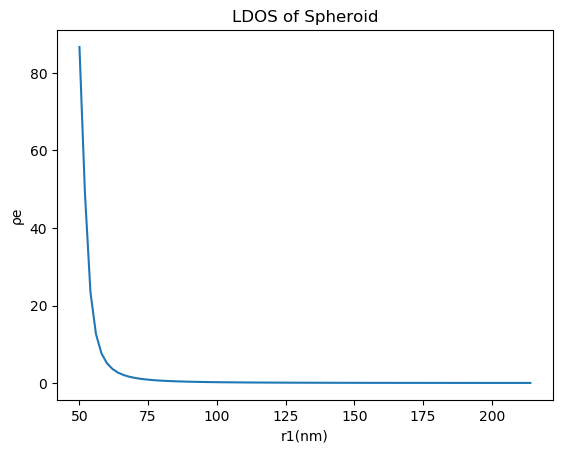

PyObject Text(24.000000000000007, 0.5, 'ρe')

In [32]:
#d_min = 203.4 λ=550 nm
Data=[ #1 Rho_s
 #2 Dfdr1_t (Theoretical gradients using SIE) 
 #2 Dfdr2_t (Theoretical gradients using SIE) 
 #3 Dfdr_s (Simulation gradients using forward diff)
86.7053 496.854 25.7394 -18891.7
48.9218 -18996.6 -13360.2 -12725.3
23.4713 -8060.43 -7241.13 -5398.33
12.6747 -3499.96 -3354.98 -2498.88
7.6769 -1713.92 -1698.52 -1281.04
5.11482 -948.774 -964.511 -735.233
3.64435 -575.694 -598.042 -469.796
2.70476 -369.912 -391.872 -305.214
2.09433 -252.53 -272.718 -215.553
1.66323 -178.816 -196.495 -151.886
1.35946 -132.013 -147.748 -115.501
1.12846 -99.6922 -113.571 -86.5425
0.955371 -77.4802 -89.8336 -70.1478
0.815076 -60.9029 -71.7901 -54.5366
0.706002 -48.9429 -58.6863 -44.146
0.617711 -39.9159 -48.6683 -35.8852
0.54594 -33.037 -40.9738 -30.3752
0.48519 -27.5639 -34.7583 -25.4106
0.434368 -23.2479 -29.7998 -21.2114
0.391946 -19.8306 -25.8458 -18.7755
0.354395 -16.9704 -22.4757 -15.517
0.323361 -14.7119 -19.8124 -14.1835
0.294994 -12.7536 -17.4411 -11.7137
0.271566 -11.1989 -15.5734 -10.53
0.250506 -9.86356 -13.936 -9.26854
0.231969 -8.73569 -12.5441 -8.27251
0.215424 -7.76778 -11.3339 -7.32589
0.200772 -6.94293 -10.2924 -6.654
0.187464 -6.22146 -9.36949 -5.80846
0.175848 -5.61107 -8.58821 -5.3512
0.165145 -5.07034 -7.88291 -4.85741
0.15543 -4.59421 -7.25632 -4.40266
0.146625 -4.17579 -6.70141 -3.94333
0.138738 -3.81201 -6.21616 -3.6722
0.131394 -3.48333 -5.77196 -3.33709
0.12472 -3.19326 -5.3749 -3.0842
0.118551 -2.93236 -5.01632 -2.8009
0.11295 -2.70093 -4.69602 -2.59615
0.107757 -2.49223 -4.40326 -2.41987
0.102918 -2.30236 -4.13524 -2.12056
0.0986764 -2.13837 -3.90516 -2.12702
0.0944224 -1.97984 -3.67461 -1.90562
0.0906111 -1.83933 -3.47258 -1.76688
0.0870774 -1.71172 -3.28789 -1.68319
0.083711 -1.59315 -3.1132 -1.50789
0.0806952 -1.48782 -2.95958 -1.45514
0.0777849 -1.38858 -2.81227 -1.35537
0.0750742 -1.29779 -2.67584 -1.22874
0.0726167 -1.21584 -2.55423 -1.21274
0.0701912 -1.13718 -2.43431 -1.09048
0.0680103 -1.0664 -2.32816 -1.01457
0.0659811 -1.00063 -2.23027 -0.978893
0.0640234 -0.938294 -2.13565 -0.898765
0.0622258 -0.880605 -2.04959 -0.855198
0.0605154 -0.828357 -1.9682 -0.78572
0.058944 -0.778649 -1.89366 -0.773621
0.0573967 -0.730262 -1.82005 -0.70949
0.0559778 -0.685082 -1.75322 -0.653416
0.0546709 -0.643441 -1.69134 -0.614824
0.0534413 -0.60363 -1.63315 -0.611873
0.0522175 -0.564955 -1.57467 -0.522456
0.0511726 -0.529738 -1.52504 -0.521217
0.0501302 -0.495117 -1.47476 -0.469043
0.0491921 -0.462272 -1.42947 -0.440264
0.0483116 -0.430063 -1.38635 -0.402287
0.047507 -0.400333 -1.34633 -0.386208
0.0467346 -0.370019 -1.30702 -0.367216
0.0460002 -0.340268 -1.26935 -0.308134
0.0453839 -0.31275 -1.23655 -0.309183
0.0447655 -0.283847 -1.20268 -0.257157
0.0442512 -0.25625 -1.17304 -0.243009
0.0437652 -0.228713 -1.14408 -0.202564
0.0433601 -0.20172 -1.1181 -0.189502
0.0429811 -0.17315 -1.09175 -0.144639
0.0426918 -0.145348 -1.06881 -0.134178
0.0424234 -0.116666 -1.04633 -0.0924646
0.0422385 -0.0866264 -1.0255 -0.0805425
0.0420774 -0.0562554 -1.00491 -0.0349912
0.0420074 -0.0256757 -0.987912 -0.00696282
0.0419935 0.00846119 -0.970415 0.0515248
0.0420966 0.0448177 -0.956357 0.0561081
0.0422088 0.0810653 -0.942564 0.115356
0.0424395 0.120856 -0.930872 0.144275
]
ρs = Data[:,1];
dρ1 = Data[:,2];
dρ2 = Data[:,3];
dρs = Data[:,4];
N = length(ρs);
sr = 203.4
st = sr+(N-1)*2;
r1 = range(sr,stop=st,step=2);
plot(r1,ρs)
title("LDOS of Spheroid")
xlabel("r1(nm)")
ylabel("ρe")


In [10]:
(1.12/sqrt(4*pi))^2

0.0998219803072368

In [11]:
(0.282*1.12)^2

0.09975490560000001